In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np

In [3]:
df = pd.read_excel("datosRed.xlsx")

In [4]:
df.head()

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA


In [5]:
df['TIPO DE SERVICIO'].value_counts()

TIPO DE SERVICIO
SERV_2    4401
SERV_1    4110
SERV_4    1142
SERV_5     367
SERV_7     158
SERV_6     146
SERV_3      60
Name: count, dtype: int64

In [6]:
df['NOMBRE DE LA TAREA'].value_counts()

NOMBRE DE LA TAREA
TAREA_1.1    3330
TAREA_2.2    3141
TAREA_2.1    1260
TAREA_1.2     777
TAREA_4.1     685
TAREA_4.3     403
TAREA_5.1     243
TAREA_7.1     158
TAREA_6.1     146
TAREA_5.2     103
TAREA_3.1      48
TAREA_4.4      47
TAREA_5.3      21
TAREA_4.2       7
TAREA_3.3       7
TAREA_3.2       3
TAREA_1.3       3
TAREA_3.4       2
Name: count, dtype: int64

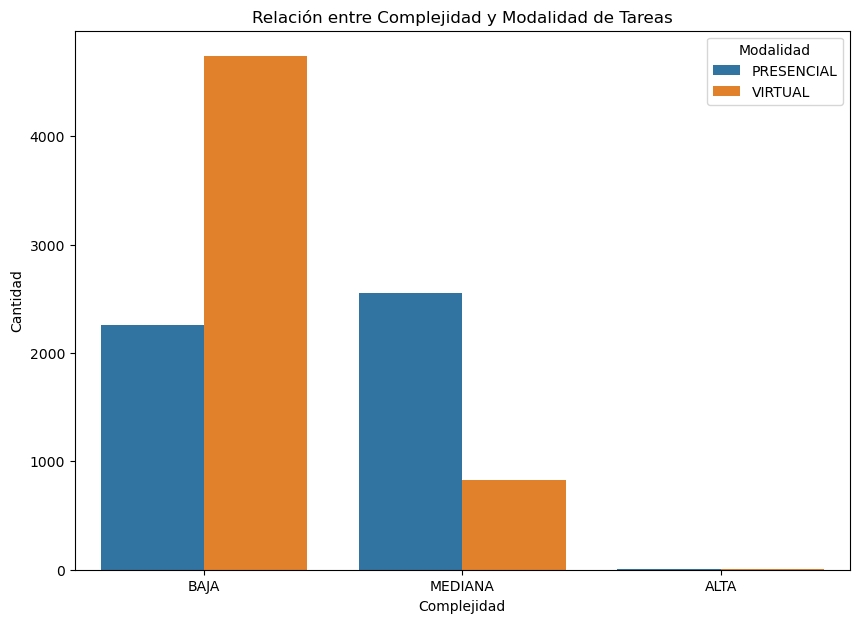

In [7]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='COMPLEJIDAD', hue='MODALIDAD', order=['BAJA', 'MEDIANA', 'ALTA'])
plt.title('Relación entre Complejidad y Modalidad de Tareas')
plt.xlabel('Complejidad')
plt.ylabel('Cantidad')
plt.legend(title='Modalidad')
plt.show()

In [ ]:
B = nx.Graph()

clientes = df['PERSONA'].unique()
servicios = df['TIPO DE SERVICIO'].unique()
B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(servicios, bipartite=1)

B.add_edges_from([tuple(x) for x in df[['PERSONA', 'TIPO DE SERVICIO']].values])

G_clientes = bipartite.projected_graph(B, clientes)

In [15]:
print(G_clientes.number_of_nodes())
print(G_clientes.number_of_edges())
print(nx.density(G_clientes))

5090
7189307
0.5550943307360805


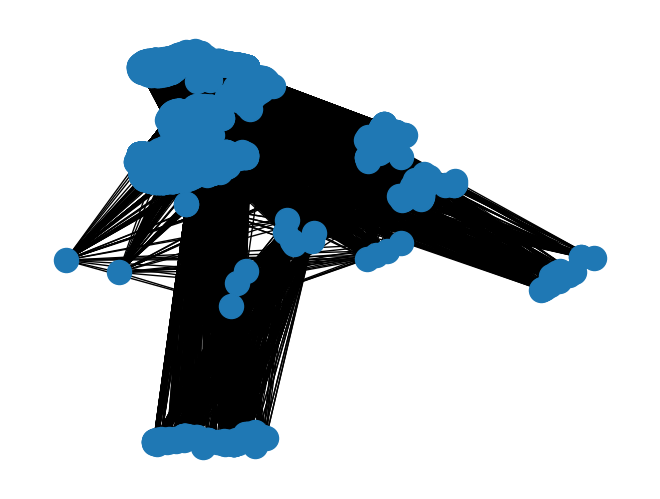

In [12]:
nx.draw(G_clientes)

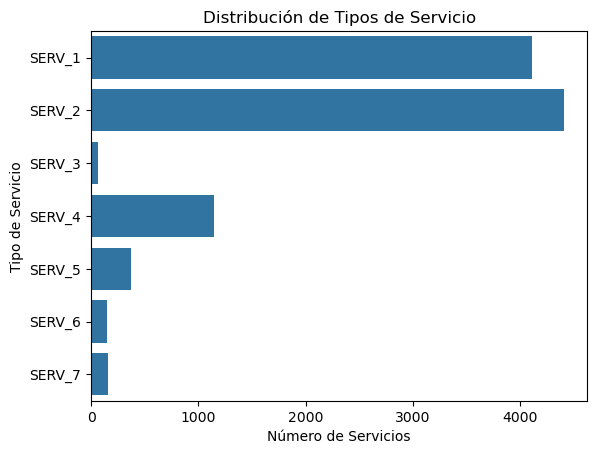

In [19]:
sns.countplot(y='TIPO DE SERVICIO', data=df)
plt.title('Distribución de Tipos de Servicio')
plt.xlabel('Número de Servicios')
plt.ylabel('Tipo de Servicio')
plt.show()

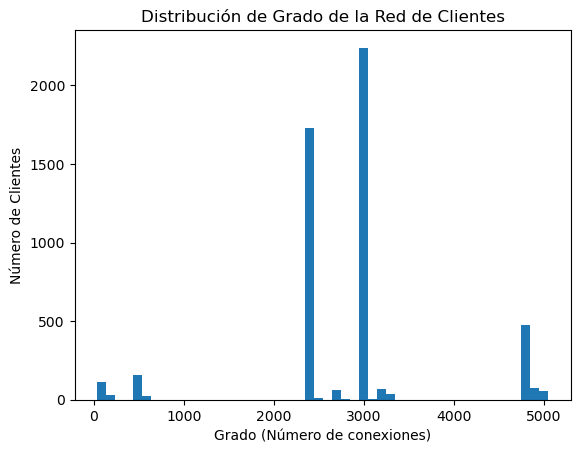

In [ ]:
grados = [val for (node, val) in G_clientes.degree()]

plt.hist(grados, bins=50)
plt.title('Distribución de Grado de la Red de Clientes')
plt.xlabel('Grado (Número de conexiones)')
plt.ylabel('Número de Clientes')
plt.show()

In [17]:
num_componentes = nx.number_connected_components(G_clientes)
print(f"La red tiene {num_componentes} componente(s) conectado(s).")

La red tiene 1 componente(s) conectado(s).


In [ ]:
def random_node(g):
    return[np.random.choice(g.nodes())]

def dismantle(g, function, **args): #remover nodoss de forma incremetnal y calcular el tamaños de los componentes conectados
    total_nodes=g.number_of_nodes()
    removed_nodes=[]
    components=[]
    while len(g.nodes())>1:
        n=function(g,**args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps=list(nx.connected_components(g))
        g_size=0
        if len(comps)>0:
            g_size=max(len(c) for c in comps)/total_nodes
        components.append(g_size)
    return removed_nodes, components


def plot_dismantle(x,y):
    plt.plot(x,y)
    plt.xlabel("removed nodes") 
    plt.ylabel("giant component size")
    plt.show()



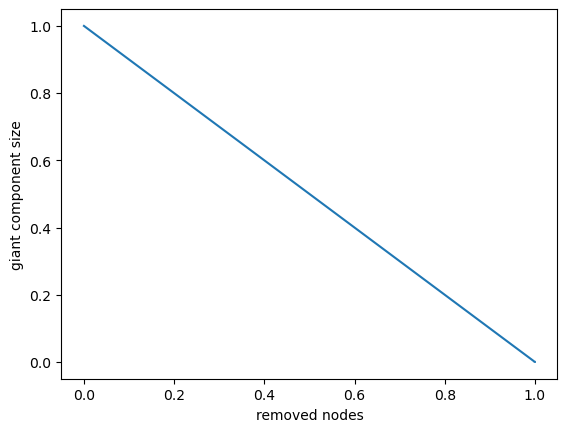

In [22]:
h=G_clientes.copy()
rn , comps=dismantle(h,random_node)
plot_dismantle(rn,comps)

In [23]:
def get_sorted_nodes(g,score,reverse=True): 
    nodes=score(g)
    if isinstance(nodes,dict):
        nodes=[(k,v) for k,v in nodes.items()]
    srt=sorted(nodes,key=lambda k:k[1],reverse=reverse)
    return [x[0] for x in srt]

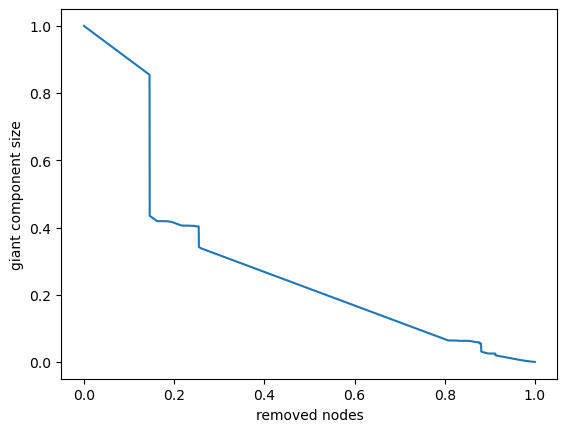

In [24]:
h=G_clientes.copy()
rn , comps=dismantle(h,get_sorted_nodes ,score=nx.degree)
plot_dismantle(rn,comps)